# Lesson 7 - Advanced Topics in Machine Learning

In order to use this file, please do the following:
*   Go to the top left corner of Google Colab and click  `File -> Save a copy in Drive`

Here's a rough overview of our plan for the weekly curriculum:

* Week 2: Introduction to Python and OOP
* Week 3: How to Code Like a Pro
* Week 4: Data Preparation and Cleaning
* Week 5: Data Visualization and Exploratory Data Analysis
* Week 6: Miscallenous Topics - Command Line, Pathing, and GitHub
* Week 7: Introduction to Machine Learning
* **Week 8: Advanced Topics in Machine Learning**
* Week 9: How to Succeed Going Forward

#Outline

1. Unsupervised Learning
  * Clustering
  * Dimensions and distance
    * KNN
    * Dimensionality reduction
      * PCA

2. Deep Learning
  * Neural Networks primer
  * Word embeddings demo



# 1. Unsupervised Learning

Last week, we introduced *supervised* machine learning. As a quick recap, supervised machine learning models rely on *labeled datasets* that allow us to build regression or classification models. In supervised machine learning, we always have some *metric* that tells us how well our model did; for example, $R^2$ scores is regression tasks and accuracy scores in classification tasks. A lot of the problems you'll be tackling in your data science projects are supervised, but it's important to be familiar with unsupervised learning as well.

The major distinction of unsupervised learning models is that they do *not* rely on labeled data. Rather, the goal of unsupervised learning algorithms is to discover hidden patterns in the data *without* the need for human input. There are three main tasks that unsupervised learning is used to accomplish: clustering, association, and dimensionality reduction. We're going to briefly introduce what each of these are as well as show you how to implement some common unsupervised learning algorithms!

**Clustering** is essentially a way of grouping observations into different *clusters* where the observations in each cluster are more similar to one another then to observations in other clusters. Cluster analysis is a useful business strategy for market segmentaton purposes, as it allows companies to group users based on common attributes and target them with different types of advertisements.

**Association** is a way of discovering interesting relationships between different variables in a dataset. For instance, given a large dataset of individuals' soft drink preferences, we may discover that if someone likes Pepsi, they also like Diet Coke.

**Dimensionality reduction** is probably the coolest of the three tasks in unsupervised ML. Given data, dimensionality reduction algorithms (like PCA, which we'll cover in a bit) attempt to reduce the number of variables in our data while retaining the most information (i.e., the combination of variables which most explain the *variance* in the data).



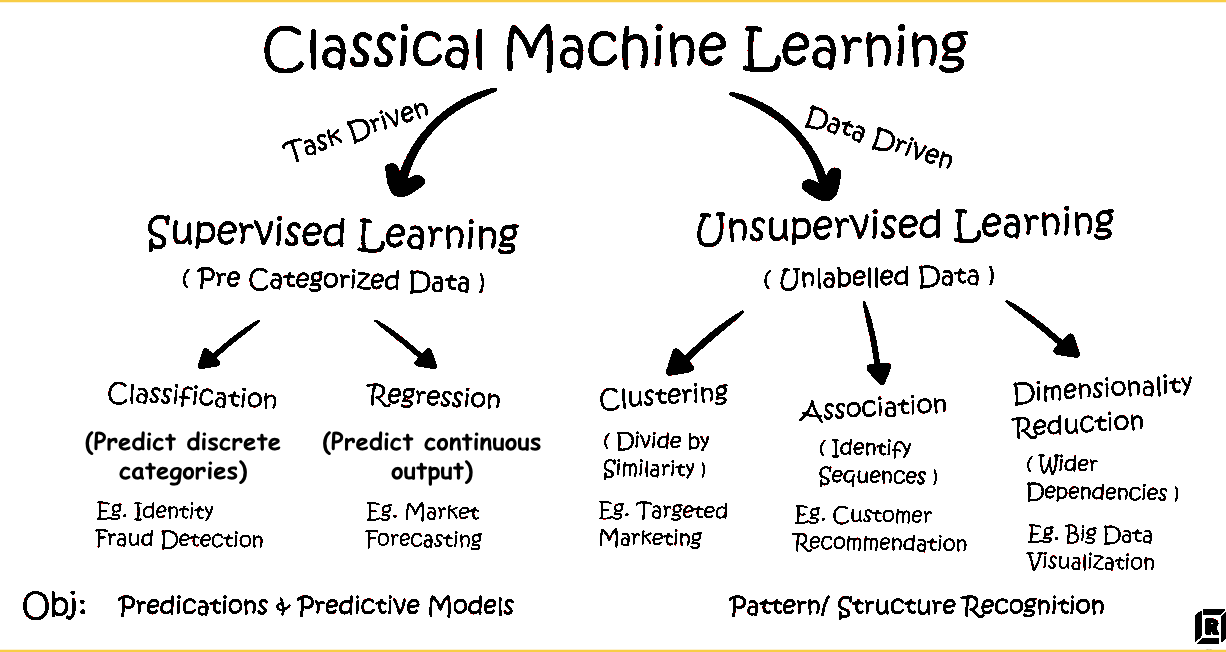

---
## K-means clustering

**K-means clustering** is one of the most basic **clustering** algorithms. It divides a set of training observations into $K$ *clusters* (or groups) and minimizes the sum of squares within each cluster. The *within-cluster sum of squares*, or *inertia*, is calculated by squaring the "distance" of each observation from the average, or *centroid*, of the cluster; see the [sklearn user guide](https://scikit-learn.org/stable/modules/clustering.html#k-means) on K-means for more detail.

To show how the K-means algorithm works, we're going to train it on the iris dataset, which we can load directly using `sklearn.datasets`:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

X.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                5.5               2.4                3.7               1.0
82                5.8               2.7                3.9               1.2
60                5.0               2.0                3.5               1.0
19                5.1               3.8                1.5               0.3
64                5.6               2.9                3.6               1.3

We won't be using them, but here are the target labels for each observation:

In [ ]:
print(f"Iris Target Data: \n{iris.target}")
print({i:name for i, name in enumerate(iris.target_names)})

Iris Target Data: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


Next, scaling the data and fitting the K-means algorithm:

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

You might be asking yourself why we're scaling the data and what scaling even is. First, let's talk about the what. Essentially, we're scaling the *features* such that each numeric value is in the interval $[-1,1]$. We do this for a few reasons:
* Some ML algorithms require scaling before the data is fed into the model
* Features with large ranges can become disproportionately more influential on the model's performance
* Gradient descent algorithms converge faster with feature scaling

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3) # we must specify the number of clusters
model.fit(X_scaled)

results = model.predict(X_scaled)
results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Plotting the results:

<span style="font-size: 8">
[Note that we're only plotting 2 of the 4 variables, which is why we see some overlap between the clusters]
</span>

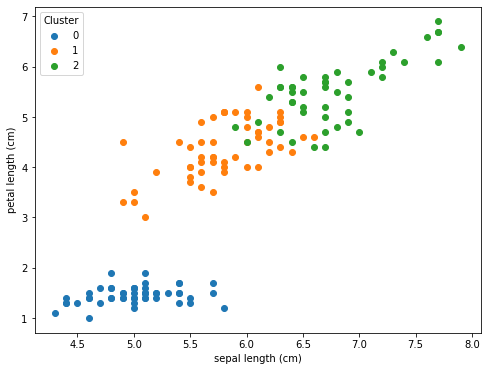

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(3):
    mask = (results == i)
    plt.scatter(X.loc[mask, 'sepal length (cm)'], X.loc[mask, 'petal length (cm)'], label=i)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(title="Cluster")
plt.show()

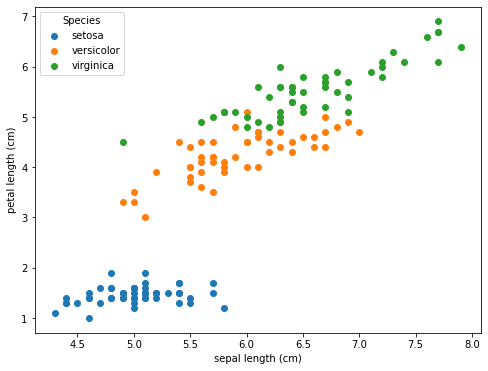

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(3):
    mask = (iris.target == i)
    plt.scatter(X.loc[mask, 'sepal length (cm)'], X.loc[mask, 'petal length (cm)'], label=iris.target_names[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(title="Species")
plt.show()

---
## K-Nearest Neighbors Classification (KNN)

While this isn't an unsupervised learning algorithm, it's still super important to know. The K-Nearest Neighbors or KNN classifier is a very intuitive algorithm. Based on the majority "vote" or labels of the $k$ closest training data points, it assigns a label to a new datapoint.

Please check out [this amazing webapp by Greg Petrics](https://www.geogebra.org/m/tneq8bsv) if you'd like to further your understanding of KNN or do not understand it well.

First, we'll load in some dependencies from `scikit-learn` along with a famous dataset about the iris flower.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].transform(lambda row: iris.target_names[row])

Let's take a look at 10 random samples from our dataset.

In [ ]:
df.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
141                6.9               3.1                5.1               2.3   
44                 5.1               3.8                1.9               0.4   
40                 5.0               3.5                1.3               0.3   
25                 5.0               3.0                1.6               0.2   
60                 5.0               2.0                3.5               1.0   
6                  4.6               3.4                1.4               0.3   
61                 5.9               3.0                4.2               1.5   
112                6.8               3.0                5.5               2.1   
107                7.3               2.9                6.3               1.8   
101                5.8               2.7                5.1               1.9   

        species  
141   virginica  
44       setosa  
40       setosa  
25       setosa  
60   versicolor  
6        setosa  
61   versicolor  
112   virginica  
107   virginica  
101   virginica

Our objective is to predict the exact species of an iris flower  given some of its characteristics. 

There are three types: setosa, virgininca, and versicolor.

In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

We'll try predicting the species of iris using just the petal length and sepal width for simplicity's sake. 

So let's split our data into `X` and `y` variables.

In [ ]:
X = df[['petal length (cm)', 'sepal width (cm)']]
y = iris.target

Now, we'll transform our numerical input data using `scikit-learn`'s Standard Scaler to scale values to their z-scores.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).sample(5)

0         1
122  1.672157 -0.592373
123  0.649083 -0.822570
84   0.421734 -0.131979
65   0.364896  0.098217
58   0.478571 -0.362176

Finally, we can use the KNN Classifier Algorithm and train it on our data.

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

Let's try out our model on a random sample!

In [ ]:
scaled_df = pd.DataFrame(X_scaled)
scaled_df['species'] = iris.target
scaled_df['species'] = scaled_df['species'].transform(lambda row: iris.target_names[row])

In [ ]:
random_sample = scaled_df.sample(1)
random_sample

0         1    species
136  1.046945  0.788808  virginica

In [ ]:
petal = random_sample.iloc[0,0]
sepal = random_sample.iloc[0,1]

print(f"Petal Length (z-score): {petal}")
print(f"Sepal Width (z-score): {sepal}")

prediction = knn_3.predict([[petal, sepal]])
print(f"Actual: {random_sample.iloc[0,2]}")
print(f"Predicted: {iris.target_names[prediction]}")

Petal Length (z-score): 1.0469454037485681
Sepal Width (z-score): 0.7888075857129598
Actual: virginica
Predicted: ['virginica']


Unfortunately, our model isn't actually ready for real life application – we haven't evaluated it. We will be evaluating it using K-Folds Cross Validation while tuning the hyperparameter `k` at the same time!

**Note: The K in K-FoldsCV and the k in KNN refer to different things!**

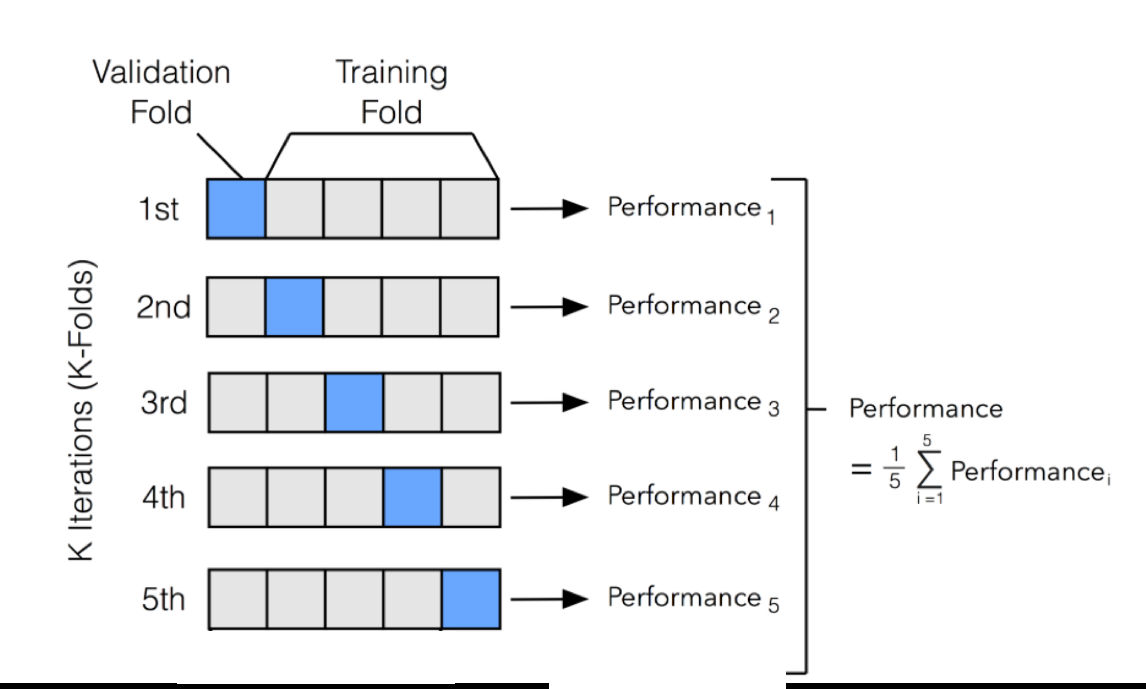

In [ ]:
from sklearn.model_selection import cross_val_score

mean_fold_errors = []

for num_neighbors in range(1, 20):
    np.random.seed(0)   # to ensure we use the same random folds
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_scaled, y, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))
    print("–"*50)

Num neighbors = 1
K-fold CV errors: [0.1   0.067 0.1   0.033 0.233]
K-fold CV mean error: 0.107
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 2
K-fold CV errors: [0.067 0.1   0.1   0.067 0.2  ]
K-fold CV mean error: 0.107
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 3
K-fold CV errors: [0.067 0.067 0.1   0.067 0.067]
K-fold CV mean error: 0.073
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 4
K-fold CV errors: [0.033 0.1   0.133 0.067 0.067]
K-fold CV mean error: 0.08
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 5
K-fold CV errors: [0.1   0.067 0.1   0.067 0.033]
K-fold CV mean error: 0.073
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 6
K-fold CV errors: [0.033 0.067 0.133 0.067 0.067]
K-fold CV mean error: 0.073
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 7
K-fold CV errors: [0.1   0.067 0.1   0.067 0.033]
K-fold CV mean error: 0.073
–––––––––––––––––––––––

Now, we're going to pick the highest value of `k` that has the lowest error rate.

In [ ]:
error_dict = {error:k_neighbors for (k_neighbors, error) in enumerate(mean_fold_errors)}
best_k = error_dict[min(error_dict.keys())]
print(f"Optimal Hyperparameter for k-neighbors = {best_k}")

Optimal Hyperparameter for k-neighbors = 6


We're ready to make our final model!

In [ ]:
from sklearn.model_selection import train_test_split

final_knn = KNeighborsClassifier(n_neighbors=best_k)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Let's plot a confusion matrix to see how the model did.

Accuracy: 96.67%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


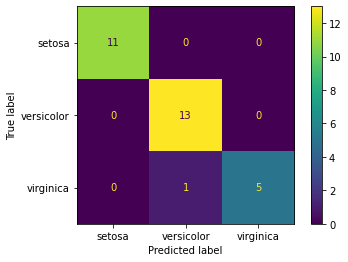

In [ ]:
from sklearn.metrics import plot_confusion_matrix

print(f"Accuracy: {final_knn.score(X_test, y_test)*100:.2f}%")
plot_confusion_matrix(final_knn, X_test, y_test, display_labels=iris.target_names)
plt.show()

---
# Dimensionality Reduction and PCA

As we've briefly mentioned in the past, **dimensionality reduction** is a way of shrinking the size of a large dataset (i.e., one with many predictors) into a smaller one such that it still retains important properties of the original data. In other words, we can reduce the complexity of the data by identifying which features are important which features are not.

**Principal component analysis**, or **PCA**, is a signal decomposition algorithm (i.e., one that breaks down something complex into smaller pieces) which allows us to find the latent variables in our data while retaining as much information as possible. In mathematical terms, it finds the linear combinations of the variables which *explain the most variance* within the data. In order to understand the intuition behind PCA, read and interact with this [visualization webapp by setosa.io](https://setosa.io/ev/principal-component-analysis/)

For this demonstration, we'll be using the Red Wine Quality dataset from the UCI ML repository which we worked with last week.

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep= ";")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
df.shape

(1599, 12)

This dataset has 12 variables, so if we wanted to predict `quality`, we'd have 11 predictor variables to work with. Often, however, simpler models are better and not every variable in this dataset is necessarily a strong predictor for `quality`. Let's implement PCA to see if we can reduce the number of features before we build a model. We can break up the data into `X` and `y` to start:

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

Then, we center and scale (i.e., take the Z-scores of) the training data using `sklearn.preprocessing.StandardScaler()`, so that each variable has the same variance &mdash; we don't want any of the variables to outweigh the others:

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# This does the same thing, using pandas operations:
# X_scaled = (X - X.mean()) / X.std()

We can then run the PCA algorithm and plot the results:

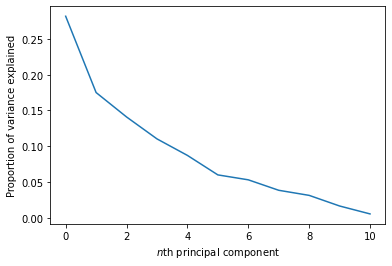

In [ ]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(X_scaled)

plt.plot(model.explained_variance_ratio_)
plt.xlabel('$n$th principal component')
plt.ylabel('Proportion of variance explained')
plt.show()

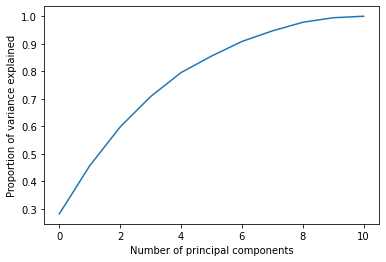

In [ ]:
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')
plt.show()

From this plot, we can see that to keep around 90% of the "information" of the training data, we only need to take the first 6 or 7 principal components.

To see what the principal components actually are, we can look at the `.components_` attribute:

In [ ]:
model.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [ ]:
pd.DataFrame(model.components_, columns=X.columns)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.489314         -0.238584     0.463632        0.146107   0.212247   
1       -0.110503          0.274930    -0.151791        0.272080   0.148052   
2       -0.123302         -0.449963     0.238247        0.101283  -0.092614   
3       -0.229617          0.078960    -0.079418       -0.372793   0.666195   
4       -0.082614          0.218735    -0.058573        0.732144   0.246501   
5        0.101479          0.411449     0.069593        0.049156   0.304339   
6       -0.350227         -0.533735     0.105497        0.290663   0.370413   
7       -0.177595         -0.078775    -0.377516        0.299845  -0.357009   
8       -0.194021          0.129110     0.381450       -0.007523  -0.111339   
9       -0.249523          0.365925     0.621677        0.092872  -0.217671   
10       0.639691          0.002389    -0.070910        0.184030   0.053065   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             -0.036158              0.023575  0.395353 -0.438520   0.242921   
1              0.513567              0.569487  0.233575  0.006711  -0.037554   
2              0.428793              0.322415 -0.338871  0.057697   0.279786   
3             -0.043538             -0.034577 -0.174500 -0.003788   0.550872   
4             -0.159152             -0.222465  0.157077  0.267530   0.225962   
5             -0.014000              0.136308 -0.391152 -0.522116  -0.381263   
6             -0.116596             -0.093662 -0.170481 -0.025138  -0.447469   
7             -0.204781              0.019036 -0.239223 -0.561391   0.374604   
8             -0.635405              0.592116 -0.020719  0.167746   0.058367   
9              0.248483             -0.370750 -0.239990 -0.010970   0.112320   
10            -0.051421              0.068702 -0.567332  0.340711   0.069555   

     alcohol  
0  -0.113232  
1  -0.386181  
2   0.471673  
3  -0.122181  
4   0.350681  
5   0.361645  
6  -0.327651  
7  -0.217626  
8  -0.037603  
9  -0.303015  
10 -0.314526

Transforming the training data according to the principal components:

In [ ]:
results = model.transform(X_scaled)
pd.DataFrame(results).add_prefix("Component")

Component0  Component1  Component2  Component3  Component4  Component5  \
0      -1.619530    0.450950   -1.774454    0.043740    0.067014   -0.913921   
1      -0.799170    1.856553   -0.911690    0.548066   -0.018392    0.929714   
2      -0.748479    0.882039   -1.171394    0.411021   -0.043531    0.401473   
3       2.357673   -0.269976    0.243489   -0.928450   -1.499149   -0.131017   
4      -1.619530    0.450950   -1.774454    0.043740    0.067014   -0.913921   
...          ...         ...         ...         ...         ...         ...   
1594   -2.150500    0.814286    0.617063    0.407687   -0.240936    0.054835   
1595   -2.214496    0.893101    1.807402    0.414003    0.119592   -0.674711   
1596   -1.456129    0.311746    1.124239    0.491877    0.193716   -0.506410   
1597   -2.270518    0.979791    0.627965    0.639770    0.067735   -0.860408   
1598   -0.426975   -0.536690    1.628955   -0.391716    0.450482   -0.496154   

      Component6  Component7  Component8  Component9  Component10  
0      -0.161043   -0.282258    0.005098   -0.267759     0.048630  
1      -1.009829    0.762587   -0.520707    0.062833    -0.138142  
2      -0.539553    0.597946   -0.086857   -0.187442    -0.118229  
3       0.344290   -0.455375    0.091577   -0.130393     0.316714  
4      -0.161043   -0.282258    0.005098   -0.267759     0.048630  
...          ...         ...         ...         ...          ...  
1594    0.170812   -0.355866   -0.971524    0.356851    -0.053382  
1595   -0.607970   -0.247640   -1.058135    0.478879    -0.241258  
1596   -0.231082    0.079382   -0.808773    0.242248    -0.402910  
1597   -0.321487   -0.468876   -0.612248    0.779404     0.040923  
1598    1.189132    0.042176    0.404309    0.779440    -0.449781  

[1599 rows x 11 columns]

And we can keep as many principal components as we'd like. We can also specify how many components we want when we initialize the model (by default, it just gives us all of them).

The one major downside of PCA is that the resulting components aren't very interpretable: the only way to really guess what they can represent is to closely examine `model.components_`.

---
# 2. Deep Learning

😈😈😈😈😈😈😈😈😈😈😈😈😈😈

Neural Networks are arguably the most powerful and general models used in machine learning. They're generally used for supervised tasks, but as we'll see in a second, they can be used for many non-supervised tasks as well.

## What is a Neural Network?

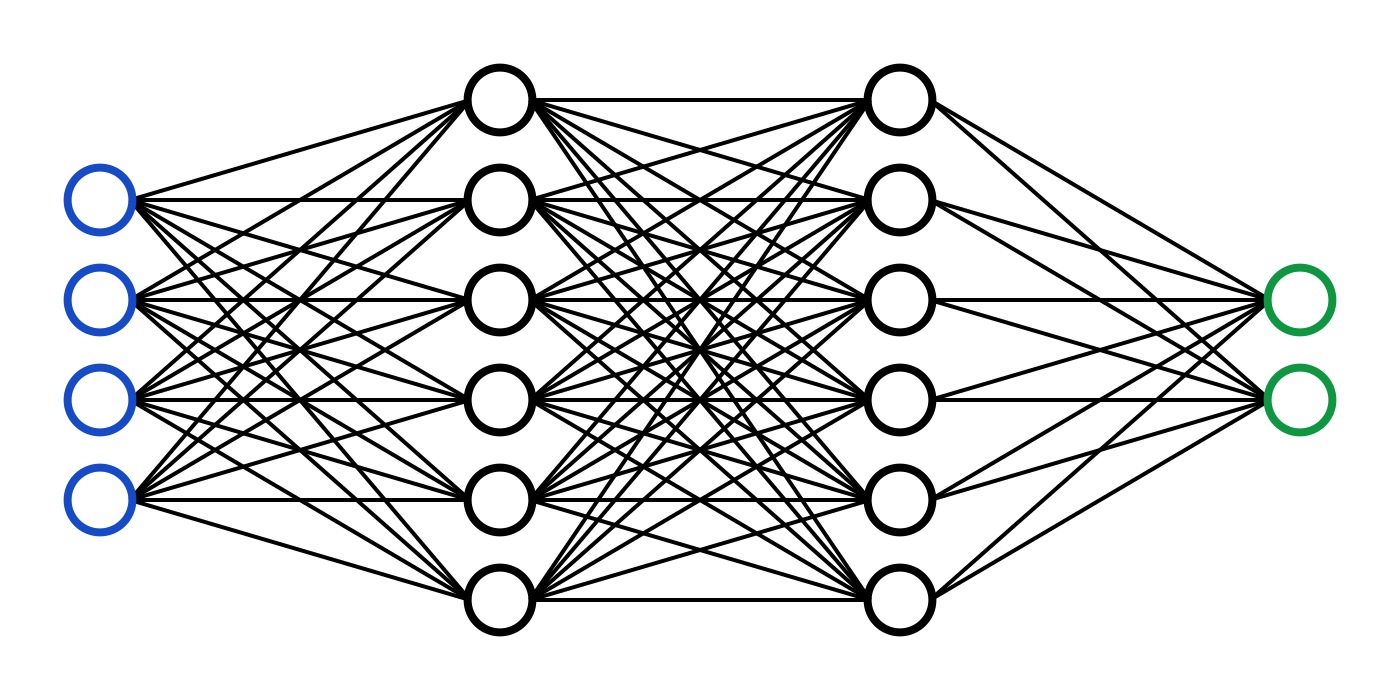

The above is an illustration of a simple neural network. Before we describe it in depth, we have to familiarize ourselves with some terminology.

A **neuron** (represented by the circles) is simply a number. A neuron can hold the value 0, or 10, or -1000. But the important takeaway is that each neuron just represents *some number*. 

A **weight** is one of the lines which connects each neuron to each other neuron. Weights also represent some scalar value, like a neuron. You can notice that even though we don't have many neurons in the above network, the number of weights (also known as **parameters** far exceeds the number of neurons in the network). Generally speaking, when the network *learns*, it's actually finding the right weights (or connections between neurons) that make our model's output best fit our dataset's labels.

A **layer** is a collection of neurons, represented visually as one of these vertical stacks. Notice the feed-forward nature of these networks: each neuron in each layer is CONNECTED TO by the layer before it, and CONNECTS to the layer after it (left-right).

The **input layer** of a network is the first set of neurons on the far left -- in our case, this neural network has an input layer with 4 neurons. This means that all the data we pass in has to have 4 features -- i.e., each neuron in the input layer needs to have a value when we actually *run* our model

The **output layer** is the last layer of neurons, and corresponds to the output of our network. If there's just one neuron, the task is usually a regression. But in our case above, we have two output neurons, which usually corresponds to a binary classification task. In other words, the top neuron might represent the odds of us predicting Class 1, and the bottom neuron represents the odds of us predicting Class 2.

A **hidden layer** is each of the black intermediate layers of neurons. These are important because they let the model learn some internal representation of our data that's different from the data we feed it. More on this when we get to the word embeddings demo.

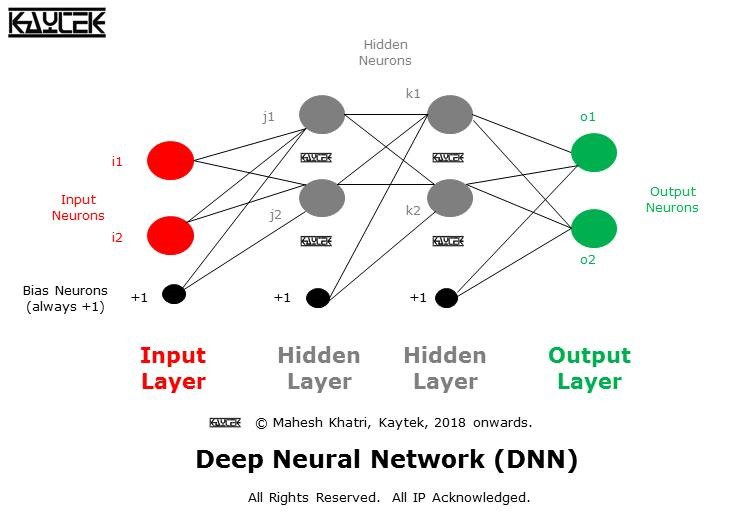

Here's another example of a neural network with labelled components.

## Ok, appreciate the vocab lesson, but how do they work?

A neural network passes through information **layer by layer**. 

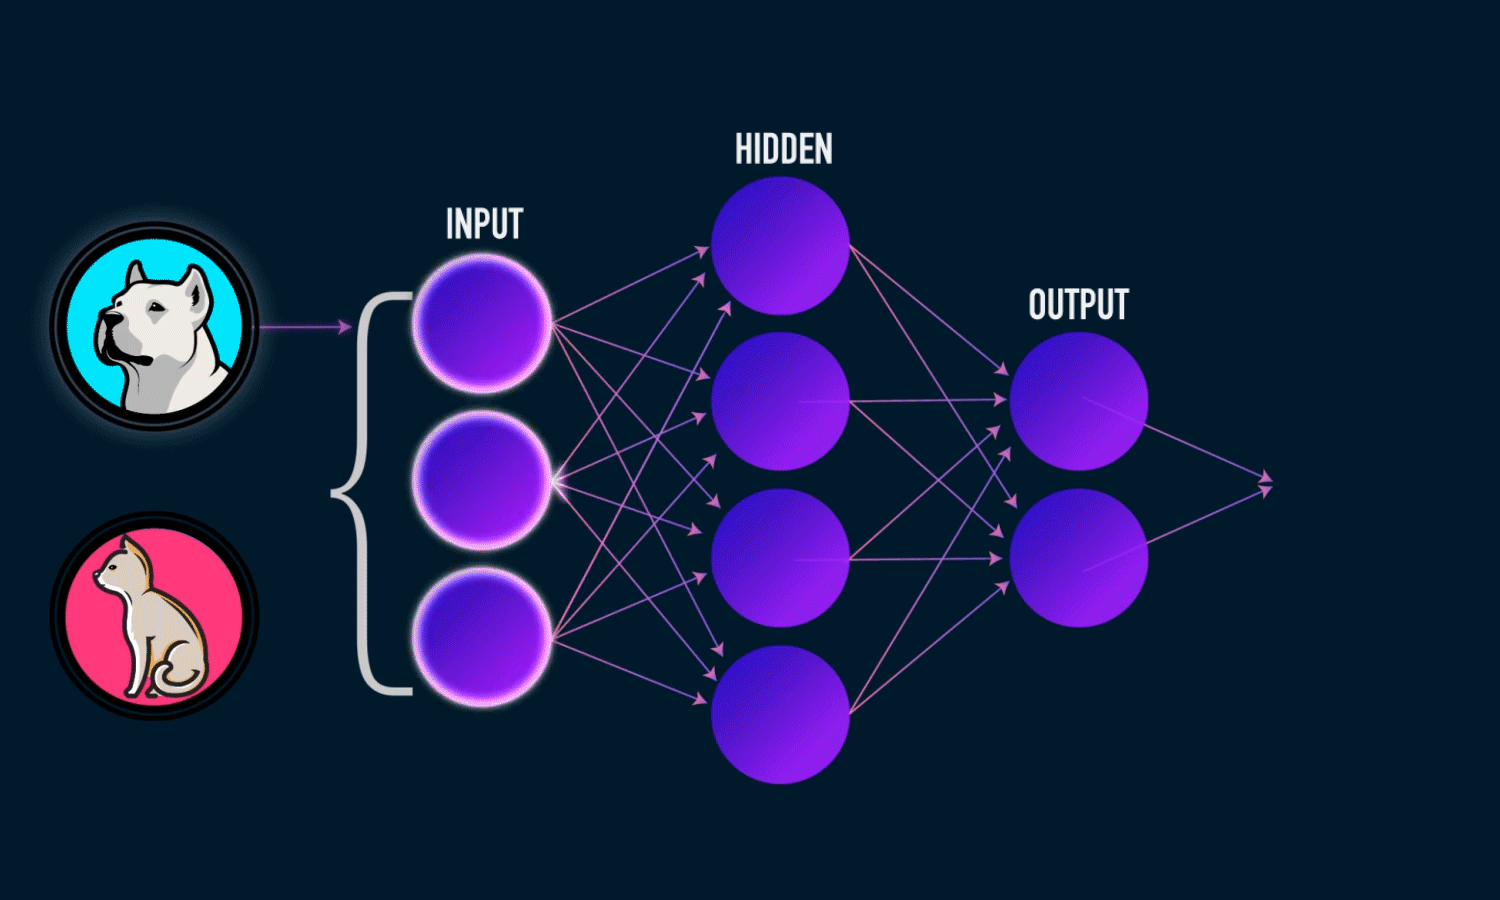

For the sake of illustration, let's look at an example neural network and see how it passes information layer to layer.



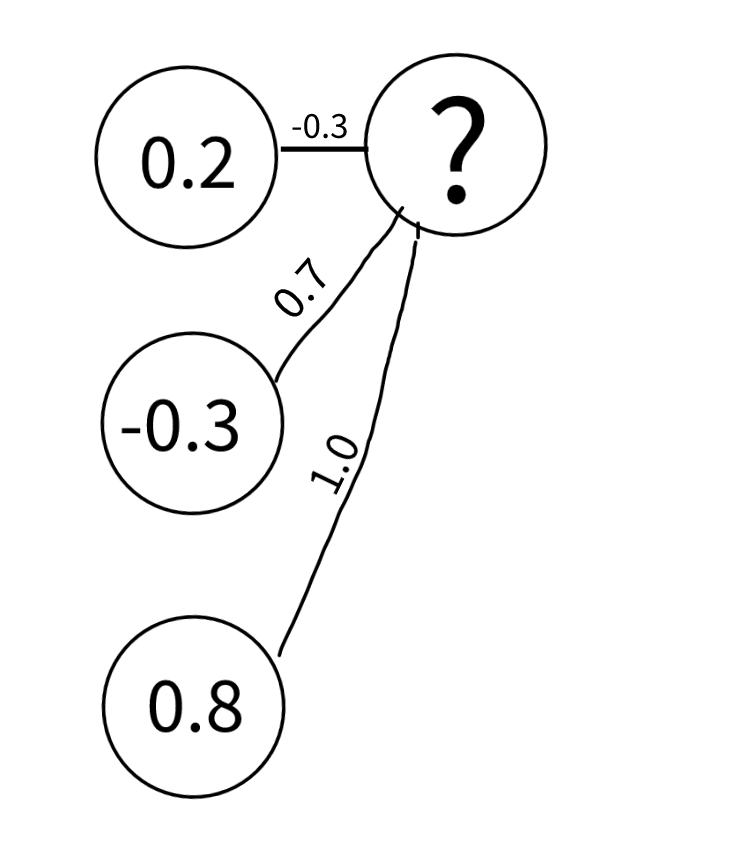

## Can anyone guess what the value of the neuron with the "?" should be?

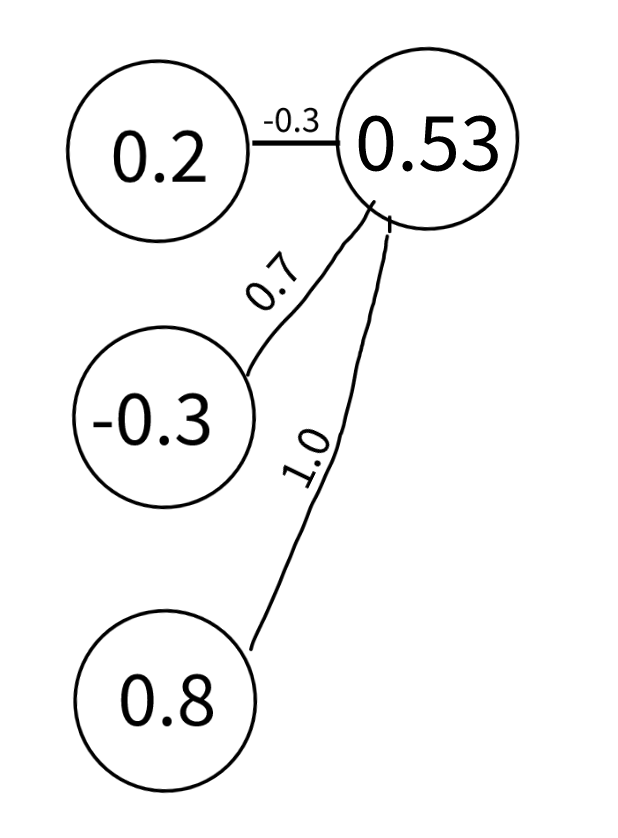

Neural networks basically treat each weight as a coefficient and just multiply the weight with the value of each neuron and pass that as a 'signal' to the next neuron. The value of the next neuron is then just the sum of the 'signals' feeding into it. This process repeats for multiple hidden layers until we reach the output.

## But this doesn't tell the entire story. 

Notice how if all of our weights and neurons had positive values, the value of our output neuron would actually be much higher than 0.53. In order to ensure the value of each neuron doesn't balloon in size between layers, we apply an **activation function** on each sum of signals before setting the next neuron's value. This function can be a sigmoid (as seen in logistic regression) or something else like `tanh(x)`. The goal is to normalize or scale really high valued signals to a range of [-1,1] before passing that neuron's information to the next layer.

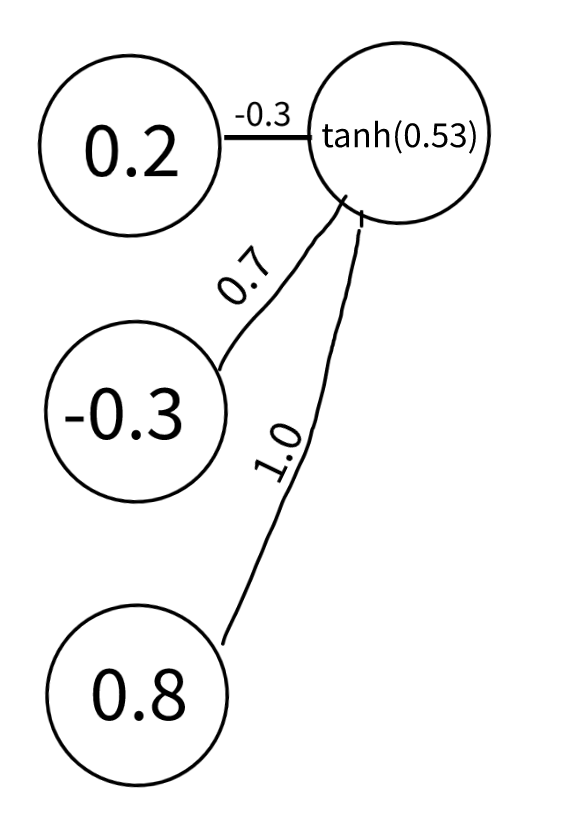

This process repeats for every neuron in every layer, until we get some output layer which we then use to interpret our network's prediction.

## How does a Neural Network learn?

Neural Networks learn like any other machine learning model. They are given some dataset with labeled examples, and try to then change/tune the model parameters to minimize some sort of "loss" or "cost" function. 

However, unlike models like linear regression, where we can explicitly find what weights will minimize the mean squared error of our residuals, neural networks don't have the luxury of having some closed form solution.

As such, Neural Networks use something called "gradient descent" to modify and tune their weights in order to minimize their loss function.


## What is gradient descent?

For those who are familiar with multivariable calculus, you'll know that the *gradient* of a multivariate function is a *vector* which tells us the *direction of steepest ascent* to maximize the value of a function. That is, how can I change the input to my function such that my function increases in value the most. Alternatively, the negative gradient tells us the direction of *steepest descent*, or the best way to change the input of our function to minimize our function.

We can apply this to our loss function: all neural network loss functions are functions of the NN weights and are differentiable, so they each have a gradient with respect to **each weight** of the network -- that is to say, with gradient descent, we can figure out how to change our weights most effectively to *minimize* the loss of our network.

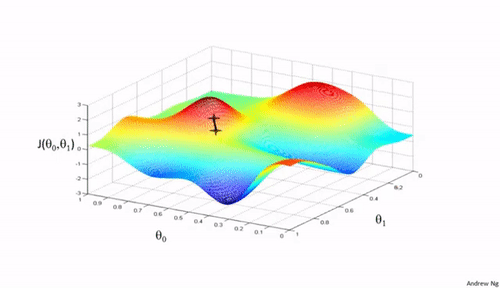

### In short -- a neural network *learns* by seeing training examples, predicting on them, and then tuning its weights between neurons to best minimize some objective loss function.

## Neural Networks in Action -- Language Embeddings

Below is gonna be a live demo of one of the coolest techniques possible with high-end neural networks -- word embeddings. At a high level, word embeddings are *vector* representations of *words*. In practice, this means I can input a sequence of words (a sentence), and the model will spit out some numeric representation of that sentence. All we're really doing is converting each word to something called a *token* (just some integer), passing a *sequence* of tokens through the network, and then only looking at the network's last hidden layer (as opposed to the output layer). Recall that each hidden state is basically a collection of numbers for any given input, so we can think of it as a vector.

The cool part about all of this is that these vector representations of words actually capture the meaning of said words. We can actually compute the *distance* between vectors in numerous different ways, and this model you're about to see has been optimized such that semantically similar words and phrases are closer to each other than non-similar words and phrases.

In [ ]:
!pip install -U sentence-transformers # install the sentence_transformers library

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we'd like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

embeddings.shape

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

(3, 384)

Here, all we've done is loaded the model (stored in the SentenceTransformer library) and had it predict on 3 separate sentences. Hence, our "emebeddings" (or vector representation) of our list of sentences has 3 rows and 384 columns -- in other words, each sentence gets turned into a vector with 384 components.

In [ ]:
embeddings[0].shape

(384,)

In [ ]:
similarity = util.cos_sim(embeddings[0], embeddings[1])
similarity

tensor([[0.4236]])

Above, we used something called *cosine similarity* to compute the similarity between sentence 1 and sentence 2 (indexed at 0 and 1 respectively). Cosine similarity computes the *angle* between two vectors (using the dot product), and then normalizes it to a metric between -1 and 1. -1 cosine similarity means the two vectors are opposite, and a similarity of 1 means they are identical (colinear). Let's see if we can make sense of what all this means with some more examples.

In [ ]:
phrases = ['I love pasta', 'I like pasta', 'Leaded gasoline is destroying the envrionment']

As you can see with the above phrases, semantically speaking, we'd expect the first two phrases to have a high similarity, whereas both would have a low similarity when compared with the leaded gasoline phrase. Let's see if the embeddings are able to capture this.

In [ ]:
embeddings = model.encode(phrases)

sim1 = util.cos_sim(embeddings[0], embeddings[1]) # we expect this to be high
print(sim1)

sim2 = util.cos_sim(embeddings[0], embeddings[2]) # we expect this to be low
print(sim2)


tensor([[0.9055]])
tensor([[-0.1294]])


As we can see, the model was able to tell that the phrases "I love pasta" and "I like pasta" are very similar to each other, whereas the phrases "I love pasta" and "Leaded gasoline is destroying the environment" are not exactly that similar, but not entirely opposite either.

Now, let's take a look if we can leverage these sentence embeddings at a larger scale to visualize text data.

In [ ]:
import pandas as pd
text_data = pd.read_csv('https://raw.githubusercontent.com/Gituhin/Sentence-Classification-naive-bayes-/main/traindata.csv')
text_data = text_data.iloc[:,0:2]
text_data.head()

category                                               text
0   science  Outer space is not friendly to life. Extreme t...
1    sports  Tennis, original name lawn tennis, game in whi...
2  business  One woman who frequently flew on Southwest was...
3     covid  In December 2019, almost seven years after the...
4   science  Any life-forms that somehow find themselves in...

Above is a dataset with a bunch of sentences and their corresponding categories. We can combine word embedding techniques with dimensionality reduction to actually *observe* the structure of our text data. I.e., which sentences are most similar / least similar to other sentences

In [ ]:
word_embeddings = model.encode(list(text_data['text']))

In [ ]:
!pip install umap-learn # install the umap package to this colab

     |████████████████████████████████| 88 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 45.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c028a40d935f0c81a058b60610ae12899addb1f52d786cd8678c6e074e77ed8b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=dccfdddaecf55668b4d235817272b81d2821337eb23e49a74f6abf084470163c
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap

reducer = umap.UMAP(n_components=2)

dim_reduced = reducer.fit_transform(word_embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Here we use UMAP, a dimensionality reduction algorithm focused on perserving the *structure* of high dimensional data when converting it to a low-dimensional representation. That is to say, points that are close together in the original dataset will stay close together in the UMAP projected version of the dataset.

In [ ]:
import numpy as np

In [ ]:
cmap = {x:i for i,x in enumerate(np.unique(text_data['category']))}

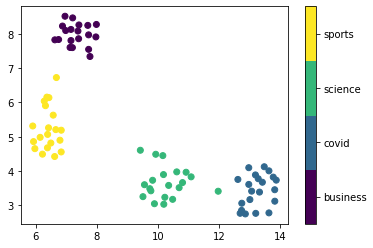

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    x=dim_reduced[:,0],
    y=dim_reduced[:,1],
    c = list(text_data['category'].map(lambda i: cmap[i]))
)
cbar = plt.colorbar(boundaries=np.arange(5)-0.5)
cbar.set_ticklabels(list(cmap.keys()))
cbar.set_ticks(np.arange(4))

As we can see, our low dimensional view into our word embeddings shows four distinct clusters in our data -- which makes sense given that there are only four categories. Furthermore, it's able to pick up that covid-related sentences are far more similar to the sentences about science than those about sports.

Tools like this allow us to *visualize* text data, which is wild. We're able to also have a computer automatically tell us how similar or different two pieces of text are, which has so many useful applications. These neural networks which understand language input (commonly referred to as LLMs or Large Language Models) are the hottest and most impactful area of research in machine learning at the moment.

## We hope that was a cool demo -- you can see how using our computers to understand language might come up in tons of tasks, like Google searches or other text retrieval tasks. This is just one small slice into all the cool shit you can do with machine learning -- you're at the tip of the iceberg. But we hope this gets you excited about doing data science.

---
# Anonymous Feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into consideration for future meetings: https://forms.gle/eve5noVB9ccXbomM7

#Credits

Primary Contributors:
* Daniel Mendelevitch
* Nick Monozon



Secondary Contributors:
*   Sean Tjoa
*   Tristan Dewing
*   Andy Chen
*   Emily Gong
*   Tara Jaigopal

